In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
#here you can put the strings you want to get rid off when showing the titles
list_authors_to_replace=['Zola-Emile','Dumas-Alexandre-Pere','Dumas-Alexandre','Balzac-Honore-de','Verne-Jules','Sand-George','Flaubert-Gustave']
list_authors_to_find=['Giono-Jean']
list_titles_to_find=['Les-Miserables']
argsfig='./figs/indiv_chaps/les_miserables'

In [5]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, "")
    return text

In [6]:
list_chaps=list()

In [7]:
with open("/home/odysseus/Bureau/chapitres/code/topic_modelling_mallet/results/doc-topics-chaps-names-adj.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        docname = os.path.basename(docname)
        if docname.split('_')[2] in list_titles_to_find:
        #if docname.split('_')[1] in list_authors_to_find and ('_1.' in docname or '_'+str(max(list_chaps))+'.' in docname):
            #docname=replace_all(docname, list_authors_to_replace)
            docname=docname.split('_')[3].replace('.txt','')
            mallet_docnames.append(int(docname))
            print(docname)
            for topic, share in grouper(2, values):
                triple = (int(docname), int(topic), float(share))
                doctopic_triples.append(triple)

117
299
253
56
123
165
339
12
338
208
352
2
275
26
359
358
99
91
324
254
329
93
292
103
308
243
199
267
302
17
214
52
137
334
310
248
284
31
325
156
157
266
246
134
190
110
16
59
69
289
211
278
295
298
6
45
112
77
291
78
304
24
57
361
144
258
250
122
107
237
138
82
354
222
43
49
365
332
288
18
192
355
231
261
72
219
271
224
321
185
46
86
318
70
244
166
327
139
269
195
263
90
341
15
167
105
75
23
221
276
119
9
4
268
259
61
178
161
169
256
346
25
101
104
171
164
217
241
225
257
145
121
200
13
234
146
108
252
170
265
285
207
89
356
342
8
118
210
133
347
151
240
270
343
236
351
106
113
155
187
28
233
168
196
238
286
62
326
333
331
242
316
180
73
176
212
277
141
303
305
114
102
315
128
350
51
293
360
340
88
232
206
283
296
184
255
223
348
54
323
364
300
282
249
198
330
162
215
48
147
124
182
11
160
353
142
58
159
83
213
194
67
202
7
92
150
21
357
301
175
42
281
1
188
74
68
328
96
264
29
230
320
116
80
309
125
143
33
129
5
84
228
235
280
55
239
362
272
98
14
35
245
22
274
115
312
85
181
20
2

In [8]:
print(doctopic_triples)

[(117, 5, 0.22286821705426357), (117, 6, 0.12596899224806202), (117, 15, 0.07170542635658915), (117, 12, 0.06782945736434108), (117, 9, 0.06782945736434108), (117, 10, 0.060077519379844964), (117, 2, 0.060077519379844964), (117, 14, 0.044573643410852716), (117, 1, 0.044573643410852716), (117, 0, 0.044573643410852716), (117, 17, 0.03294573643410853), (117, 18, 0.025193798449612403), (117, 11, 0.02131782945736434), (117, 8, 0.02131782945736434), (117, 3, 0.02131782945736434), (117, 19, 0.01744186046511628), (117, 16, 0.013565891472868217), (117, 13, 0.013565891472868217), (117, 4, 0.013565891472868217), (117, 7, 0.009689922480620155), (299, 11, 0.2526254375729288), (299, 0, 0.1896149358226371), (299, 12, 0.09159859976662778), (299, 17, 0.08576429404900816), (299, 5, 0.06709451575262544), (299, 2, 0.060093348891481914), (299, 7, 0.05309218203033839), (299, 1, 0.049591598599766626), (299, 13, 0.046091015169194866), (299, 14, 0.03208868144690782), (299, 18, 0.014585764294049008), (299, 16, 

In [9]:
mallet_docnames = sorted(mallet_docnames)

In [10]:
num_docs = len(mallet_docnames)

In [11]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [12]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

7300
20


In [13]:
doctopic = np.zeros((num_docs, num_topics))

In [14]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [15]:
novel_names = []

In [16]:
for fn in mallet_docnames:
    basename = os.path.basename(str(fn))
    name, ext = os.path.splitext(basename)
    novel_names.append(name)
print(len(novel_names))

365


In [17]:
novel_names = np.asarray(novel_names)

In [18]:
doctopic

array([[0.01495017, 0.01162791, 0.1744186 , ..., 0.03156146, 0.03488372,
        0.01495017],
       [0.00511247, 0.01124744, 0.2402863 , ..., 0.01533742, 0.05419223,
        0.00715746],
       [0.0102459 , 0.1454918 , 0.17827869, ..., 0.02254098, 0.03893443,
        0.01434426],
       ...,
       [0.10788787, 0.023794  , 0.01271186, ..., 0.05508475, 0.02509778,
        0.01336375],
       [0.06454006, 0.02893175, 0.03486647, ..., 0.08679525, 0.00519288,
        0.00519288],
       [0.06302521, 0.24789916, 0.07983193, ..., 0.08823529, 0.0210084 ,
        0.0210084 ]])

In [19]:
doctopic_orig = doctopic.copy()

In [20]:
num_groups = len(set(novel_names))
print(num_groups)

365


In [21]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [22]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [23]:
doctopic = doctopic_grouped

In [24]:
doctopic

array([[0.01495017, 0.01162791, 0.1744186 , ..., 0.03156146, 0.03488372,
        0.01495017],
       [0.09468284, 0.1068097 , 0.20848881, ..., 0.01632463, 0.0443097 ,
        0.00606343],
       [0.04364798, 0.00390348, 0.00390348, ..., 0.08339248, 0.01809794,
        0.00532292],
       ...,
       [0.25902527, 0.31859206, 0.01714801, ..., 0.05505415, 0.01534296,
        0.00631769],
       [0.01585821, 0.17070896, 0.00839552, ..., 0.0886194 , 0.01958955,
        0.01399254],
       [0.07882883, 0.06081081, 0.03828829, ..., 0.02027027, 0.02027027,
        0.02477477]])

In [25]:
N, K = doctopic.shape
print(K)

20


In [26]:
ind = np.arange(N)

In [27]:
width = 0.5

In [28]:
plt.rcParams["figure.figsize"] = [16,9]

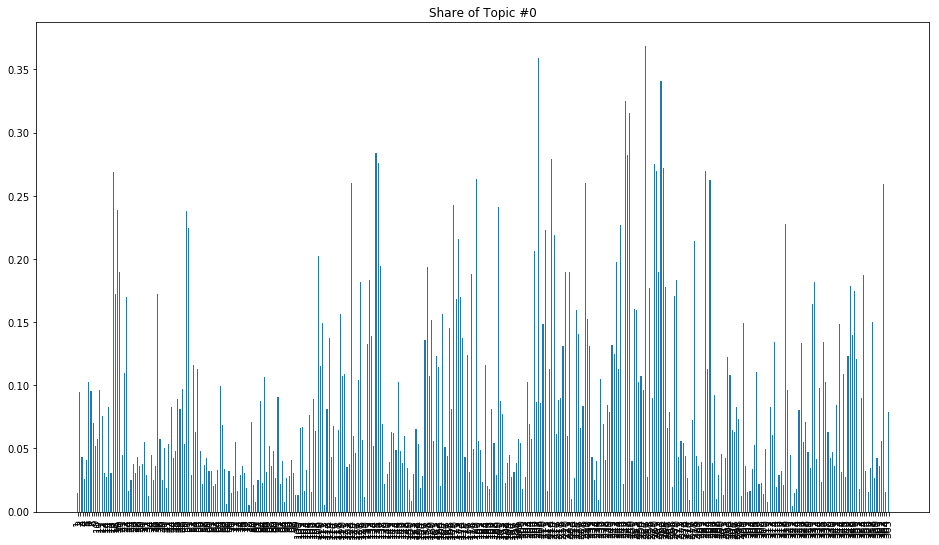

In [29]:
plt.bar(ind, doctopic[:,0], width=width)
plt.xticks(rotation=90)
plt.xticks(ind + width/2, novel_names)
plt.title('Share of Topic #0')
plt.show()

In [30]:
plots = []

In [31]:
height_cumulative = np.zeros(N)

In [32]:
list_topics =['espace domestique', 'vie conjugale', 'affaires/argent/mondanités', '?', 'noblesse', 'justice/crime', 'réflexions sur l\'existence', 'police/intrigue/bureaucratie', 'corps public/théâtre/festivités', 'temps','armée','?','nature/éléments/cosmos','voyage','sentiment','corps (morbide ?)','marine','famille','nature/végétal','religion']

In [33]:
list_topics_glob =['monde domestique', 'temps', 'famille', 'marine', 'corps (entier)', 'réflexions sur l\'existence', '?', 'famille (proche) ?', 'crime/affaire','armée', 'religion','sentiment','corps (visage)','mondanités','noblesse/titres','argot','nature','noblesse/lieux de noblesse','vie/mort','?']

In [34]:
list_topics_glob_chaps =['savoir (universitaire ?)', '?', 'judiciaire', '? (monde de la ville et de la nuit)', 'armée', 'marine', 'sentiments', 'noblesse (de salon)', 'arts','religion', 'nature','police','argent/affaires','corps','nature/éléments','monde domestique','troquets ?','chasse/homme et animal','famille','noblesse masculine/haute noblesse']

In [35]:
list_topics_glob_adj =['drame/crime', 'nature', 'religion', '?', 'haute noblesse/noblesse masculine', '?', 'famille', 'marine', 'mondanités/salons','corps intime/visage', 'affaires/argent','armée','espace domestique/espace du boudoir ?','réflexions existencielles/savoir','sentiments','noblesse (versant galanterie)','temps','couleur','?','technologie ?']

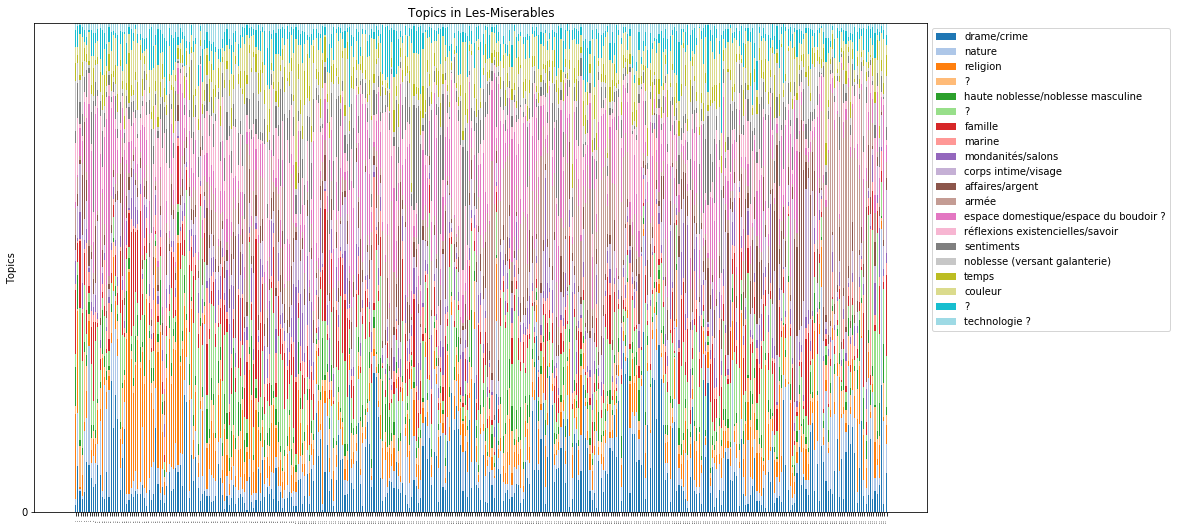

In [36]:
fig=plt.figure()
for k in range(K):
    color = plt.cm.tab20(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)

plt.ylim((0, 1))
plt.ylabel('Topics')
plt.title('Topics in '+', '.join(list_titles_to_find))
#ici mettre fontsize à 2 pour les romans à beaucoup de chapitres, et 6 ou 8 pour les autres
plt.xticks(rotation=90,fontsize =2)
plt.xticks(ind+width/2, novel_names)
plt.yticks(np.arange(0, 1, 10))
topic_labels = [k for k in list_topics_glob_adj]
plt.legend([p[0] for p in plots], topic_labels,bbox_to_anchor=(1,1), loc="upper left")
fig.savefig(argsfig+'.png',bbox_inches='tight',dpi=300)
plt.close(fig)
display(fig)